In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
summer_data = pd.read_csv('summer.csv')

In [4]:
summer_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
summer_data.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [6]:
summer_data.shape

(31165, 9)

In [7]:
summer_data['Athlete'].str.split(', ').head()

0         [HAJOS, Alfred]
1      [HERSCHMANN, Otto]
2     [DRIVAS, Dimitrios]
3    [MALOKINIS, Ioannis]
4    [CHASAPIS, Spiridon]
Name: Athlete, dtype: object

In [8]:
summer_data['Athlete'].str.split(', ').str[::-1].str.join(" ").head()

0         Alfred HAJOS
1      Otto HERSCHMANN
2     Dimitrios DRIVAS
3    Ioannis MALOKINIS
4    Spiridon CHASAPIS
Name: Athlete, dtype: object

In [9]:
summer_data['Athlete'] = summer_data['Athlete'].str.split(', ').str[::-1].str.join(" ").str.title()

In [10]:
summer_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [11]:
menData = summer_data[summer_data['Gender'] == 'Men']
womenData = summer_data[summer_data['Gender'] == 'Women']

In [12]:
menData.shape

(22746, 9)

In [13]:
womenData.shape

(8419, 9)

In [14]:
# find out the male athlete with highest number of medals
# find out the female athlete with highest number of medals

In [15]:
print("Male athlete with highest number of medals : ")
pd.value_counts(menData['Athlete']).head(1)

Male athlete with highest number of medals : 


Michael Phelps    22
Name: Athlete, dtype: int64

In [16]:
print("Female athlete with highest number of medals : ")
pd.value_counts(womenData['Athlete']).head(1)

Female athlete with highest number of medals : 


Larisa Latynina    18
Name: Athlete, dtype: int64

In [17]:
# Using groupby
# menData.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(1)

In [18]:
# menData['Athlete'].value_counts()

In [19]:
# menData['Medal'].count()

In [20]:
# male athlete with max gold, silver and bronze
# menData.groupby(['Athlete','Medal']).size().reset_index()

In [21]:
# total medals won by top 10 countries

In [22]:
# show medal tally of any one country

In [23]:
menData.groupby('Athlete')

In [24]:
menData.groupby('Athlete')['Medal']

In [25]:
menData.groupby('Athlete')['Medal'].count().reset_index().head()

,Athlete,Medal
0,- Johnson,2
1,..... Daumain,1
2,A. Albert,1
3,A. B. Zumelzu,1
4,A. Bögli,1


In [26]:
menData.groupby(['Athlete','Medal'])['Sport'].count().reset_index().head()

,Athlete,Medal,Sport
0,- Johnson,Bronze,1
1,- Johnson,Gold,1
2,..... Daumain,Bronze,1
3,A. Albert,Gold,1
4,A. B. Zumelzu,Silver,1


In [27]:
menData.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport', ascending = False).head()

,Athlete,Medal,Sport
12806,Michael Phelps,Gold,18
2675,Carl Lewis,Gold,9
12271,Mark Spitz,Gold,9
14059,Paavo Nurmi,Gold,9
16242,Sawao Kato,Gold,8


In [28]:
medals = menData.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport', ascending = False)

In [29]:
medals.drop_duplicates('Medal')

,Athlete,Medal,Sport
12806,Michael Phelps,Gold,18
773,Alexei Nemov,Bronze,6
507,Aleksandr Dityatin,Silver,6


In [30]:
summer_data.groupby(['Country'])['Medal'].count().sort_values(ascending=False).reset_index().head()

,Country,Medal
0,USA,4585
1,URS,2049
2,GBR,1720
3,FRA,1396
4,GER,1305


In [31]:
countries = summer_data.groupby(['Country','Medal'])['Sport'].count().reset_index().sort_values(by='Sport', ascending=False)

In [32]:
countries.head()

,Country,Medal,Sport
327,USA,Gold,2235
328,USA,Silver,1252
326,USA,Bronze,1098
321,URS,Gold,838
322,URS,Silver,627


In [33]:
countries.pivot('Country','Medal','Sport').fillna(0).head()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,0.0,0.0
AHO,0.0,0.0,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0


In [45]:
countries = countries.pivot('Country','Medal','Sport').fillna(0)

In [46]:
countries.sort_values(by='Gold', ascending=False).head()

Medal,Bronze,Gold,Silver
Country,,,
USA,1098.0,2235.0,1252.0
URS,584.0,838.0,627.0
GBR,553.0,546.0,621.0
ITA,404.0,476.0,416.0
GER,475.0,452.0,378.0


In [47]:
top_countries = countries.sort_values(by='Gold', ascending=False).head(10)

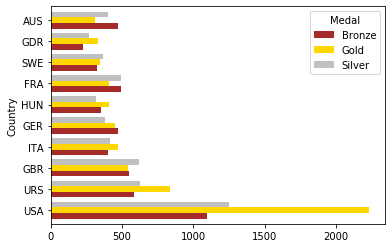

In [50]:
top_countries.plot.barh(width=0.8,color=['brown','gold','silver'])

Text(0.5, 1.0, 'Medal Distribution of top 10 countries')

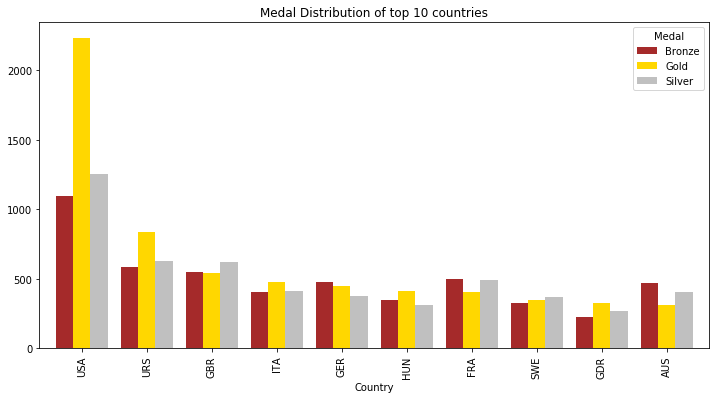

In [54]:
top_countries.plot.bar(width=0.8,color=['brown','gold','silver'])
figure = plt.gcf()
figure.set_size_inches(12,6)
plt.title("Medal Distribution of top 10 countries")

In [55]:
summer_data.groupby(['Country','Year'])['Medal'].count().head()

Country  Year
AFG      2008    1
         2012    1
AHO      1988    1
ALG      1984    2
         1992    2
Name: Medal, dtype: int64

In [66]:
temp_df = summer_data.groupby(['Country','Year'])['Medal'].count().reset_index()

In [67]:
temp_df.head()

,Country,Year,Medal
0,AFG,2008,1
1,AFG,2012,1
2,AHO,1988,1
3,ALG,1984,2
4,ALG,1992,2


In [69]:
temp_df.shape

(1157, 3)

In [72]:
temp_df.index

RangeIndex(start=0, stop=1157, step=1)

In [74]:
temp_df[temp_df['Country'].isin(summer_data['Country'])].head()

,Country,Year,Medal
0,AFG,2008,1
1,AFG,2012,1
2,AHO,1988,1
3,ALG,1984,2
4,ALG,1992,2


In [76]:
summer_data['Country'].value_counts()[:5].index

Index(['USA', 'URS', 'GBR', 'FRA', 'GER'], dtype='object')

In [77]:
temp_df = temp_df[temp_df['Country'].isin(summer_data['Country'].value_counts()[:5].index)]

In [78]:
temp_df.head()

,Country,Year,Medal
357,FRA,1896,11
358,FRA,1900,185
359,FRA,1908,35
360,FRA,1912,25
361,FRA,1920,141


In [81]:
temp_df = temp_df.pivot('Year','Country','Medal')

In [85]:
temp_df.head()

Country,FRA,GBR,GER,URS,USA
Year,,,,,
1896,11.0,7.0,33.0,NaN,20.0
1900,185.0,78.0,40.0,NaN,55.0
1904,NaN,2.0,13.0,NaN,394.0
1908,35.0,347.0,22.0,NaN,63.0
1912,25.0,160.0,52.0,NaN,101.0


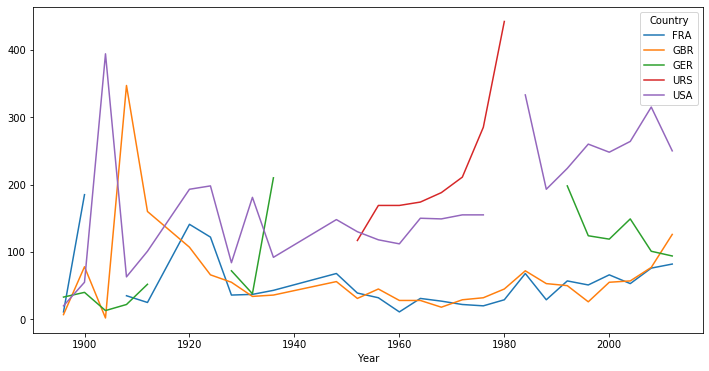

In [83]:
temp_df.plot()
figure = plt.gcf()
figure.set_size_inches(12,6)

In [86]:
temp_df = summer_data.groupby(['Country','Year'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False)

In [87]:
temp_df

,Country,Year,Medal
1081,URS,1980,442
1093,USA,1904,394
392,GBR,1908,347
1109,USA,1984,333
1115,USA,2008,315
...,...,...,...
872,QAT,1992,1
587,JAM,1972,1
870,PUR,1996,1
869,PUR,1992,1


In [3]:
summer_data['Medal'].dtype

dtype('O')